In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

%matplotlib inline


Bad key "axes.prop_cycle" on line 11 in
/Users/yyanxu/anaconda/lib/python2.7/site-packages/matplotlib/mpl-data/stylelib/seaborn.mplstyle.
You probably need to get an updated matplotlibrc file from
http://matplotlib.sf.net/_static/matplotlibrc or from the matplotlib source
distribution


In [2]:
# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

In [17]:
X

array([[-2.38519938,  0.02641654],
       [-1.74830343, -1.4226907 ],
       [-2.45431681, -1.46071435],
       ..., 
       [-1.88691344, -1.67526794],
       [-0.96714666,  4.62965124],
       [ 1.21127093,  1.53964501]])

In [18]:
y

array([0, 0, 0, 2, 1, 1, 0, 0, 0, 1, 2, 2, 2, 1, 1, 1, 1, 2, 0, 2, 0, 1, 0,
       1, 1, 2, 0, 1, 1, 1, 2, 0, 2, 0, 2, 1, 2, 2, 0, 0, 1, 0, 0, 0, 1, 2,
       0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 2, 0, 1, 2, 1, 2, 2, 0, 1, 1, 0, 1,
       0, 1, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 2, 0, 0, 2, 1, 2, 1, 2, 2, 2,
       1, 1, 2, 2, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 1, 2, 2, 1, 2, 1, 0, 1, 1,
       2, 0, 2, 1, 1, 0, 1, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 2, 1, 2, 1, 0, 1,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 2,
       0, 0, 1, 2, 2, 2, 0, 1, 2, 1, 1, 1, 0, 1, 2, 0, 2, 2, 0, 2, 2, 1, 1,
       2, 0, 1, 0, 0, 2, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 2, 2, 1, 0, 0, 1,
       0, 1, 1, 2, 0, 0, 0, 1, 2, 1, 2, 1, 2, 0, 2, 1, 1, 0, 2, 2, 1, 1, 1,
       0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 0, 2, 2, 1, 0, 2, 2, 0, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 0, 1, 2, 0,
       0, 2, 2, 2, 0, 2, 0, 0, 1, 1, 1, 2, 1, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2,
       1, 2,

## Model  

In [22]:
clf = LogisticRegression(solver='lbfgs', max_iter=100, random_state=42, multi_class='multinomial')

In [23]:
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          penalty='l2', random_state=42, solver='lbfgs', tol=0.0001,
          verbose=0)

In [24]:
# print the training scores
print("training score : %.3f (%s)" % (clf.score(X, y), multi_class))

training score : 0.995 (multinomial)


## Plot

In [9]:
# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)

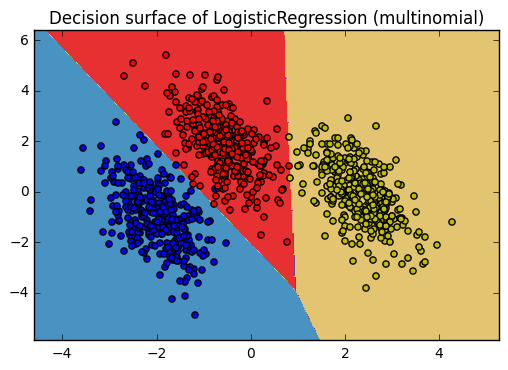

In [13]:
plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
plt.axis('tight')

# Plot also the training points
colors = "bry"
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired)